In [1]:
import os
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import math
import operator
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score

In [2]:
df = pd.read_csv('bank.csv', delimiter = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
len(df["job"].unique())

12

In [4]:
df.min()
df.replace(0, df.mean(),inplace= True)

In [5]:
df.min()

age                19
job            admin.
marital      divorced
education     primary
default            no
balance         -3313
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            4
campaign            1
pdays              -1
previous     0.542579
poutcome      failure
y                  no
dtype: object

In [6]:
df= df.drop(['marital','education', 'contact', 'day', 'month', 'poutcome'], axis=1)
df.dtypes

age           int64
job          object
default      object
balance     float64
housing      object
loan         object
duration      int64
campaign      int64
pdays         int64
previous    float64
y            object
dtype: object

In [7]:
# create dummy Variable for Purchased
df.replace(['yes','no'],[1,0],inplace=True)
df.head()

,age,job,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30,unemployed,0,1787.000000,0,0,79,1,-1,0.542579,0
1,33,services,0,4789.000000,1,1,220,1,339,4.000000,0
2,35,management,0,1350.000000,1,0,185,1,330,1.000000,0
3,30,management,0,1476.000000,1,1,199,4,-1,0.542579,0
4,59,blue-collar,0,1422.657819,1,0,226,1,-1,0.542579,0


In [8]:
df = pd.get_dummies(df) 

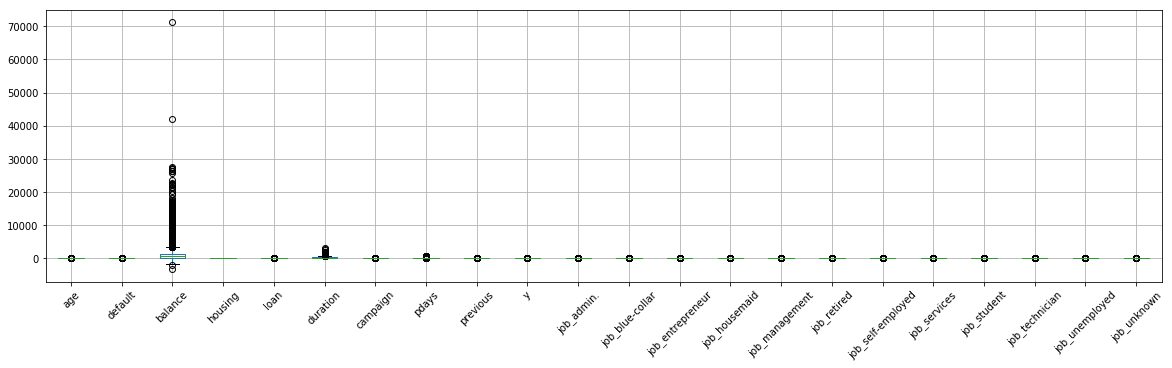

In [9]:
# check for ouliers
df.boxplot(rot=45, figsize=(20,5))

In [10]:
df.shape

(4521, 22)

In [11]:
def feature_scaling(df):
    for name in df.columns:
        df[name] = (df[name] - df[name].min()) / (df[name].max()-df[name].min())
    print(df.head())
feature_scaling(df)

        age  default   balance  housing  loan  duration  campaign     pdays  \
0  0.161765      0.0  0.068455      0.0   0.0  0.024826  0.000000  0.000000   
1  0.205882      0.0  0.108750      1.0   1.0  0.071500  0.000000  0.389908   
2  0.235294      0.0  0.062590      1.0   0.0  0.059914  0.000000  0.379587   
3  0.161765      0.0  0.064281      1.0   1.0  0.064548  0.061224  0.000000   
4  0.588235      0.0  0.063565      1.0   0.0  0.073486  0.000000  0.000000   

   previous    y  ...  job_entrepreneur  job_housemaid  job_management  \
0  0.000000  0.0  ...               0.0            0.0             0.0   
1  0.141365  0.0  ...               0.0            0.0             0.0   
2  0.018703  0.0  ...               0.0            0.0             1.0   
3  0.000000  0.0  ...               0.0            0.0             1.0   
4  0.000000  0.0  ...               0.0            0.0             0.0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \


In [12]:
# Separating the output and the parameters data frame
def separate(df):
    output = df.y
    df = df.drop('y', axis=1)
    return df, output 
df, output = separate(df)

In [13]:
# split dataset into train data and test data

def split(df,output):
    train_per = int(np.ceil((len(df) * 70) / 100))
    test_per = int(len(df) - train_per)
    
#     train_per = int(0.70*len(df))
#     test_per = len(df)-train_per
    # display data
    print("\nTraining set")
    print(train_per)
    print("\nTest data set")
    print(test_per)
    
    print("Convert pandas dataframe into numpy")
     
    x_train_data = np.array(df[:train_per])   
    x_test_data = np.array(df[:test_per])

    train_per_y = int(np.ceil((len(output) * 70) / 100))
    test_per_y = int(len(output) - train_per_y)
#     train_per_y = int(0.70*len(output))
#     test_per_y = len(output)-train_per_y
    
    
    y_train_data = np.array(output[:train_per_y])
    y_test_data = np.array(output[:test_per_y])
    
    x_train_data = x_train_data[:2000]
    y_train_data = y_train_data[:2000]
    x_test_data = x_test_data[:200]
    y_test_data = y_test_data[:200]

    return x_train_data,y_train_data,x_test_data,y_test_data

x_train_data,y_train_data,x_test_data,y_test_data = split(df,output)


Training set
3165

Test data set
1356
Convert pandas dataframe into numpy


In [14]:
df.shape
print(x_train_data.shape)
print(y_train_data.shape)
print(x_test_data.shape)
print(y_test_data.shape)
# x_train_data = x_train_data.head(500)
# x_test_data = x_test_data.head(500)


(2000, 21)
(2000,)
(200, 21)
(200,)


In [15]:
print(y_test_data)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1.]


In [16]:
print(y_train_data.shape)

(2000,)


In [17]:
print((y_train_data==0).sum())

1763


In [18]:
class Knn:
    

    
       
    def euclideanDistance(self,x_train_data, x_test_data,y_train_data):

        for i in range(0, len(x_test_data)):
            distance = []
            length = x_train_data.shape[1]
            for j in range(0, len(x_train_data)):
                temp = 0
                for k in range(0, length):
                    temp += pow(x_test_data[i][k]- x_train_data[j][k],2)
                d1 = [math.sqrt(temp), y_train_data[j]]
                distance.append(d1)

        
            sorted_data = np.sort(distance)

        return distance, sorted_data 
        
        

     
    def getKNeighbors(self,y_test_data,x_train_data, x_test_data,sorted_data):
        
        k = 5

        y_pred = np.array([])
        neighbors = np.array([])

        for t in range (0, len(y_test_data)):
            for i in range(k):
                neighbors = np.append(neighbors, sorted_data[i])
            

            count_0 = 0
            count_1 = 0

  
            for i in range(0,len(neighbors)):
   
                if neighbors[i] == 1:
                    count_1 += 1
                elif neighbors[i] == 0:
                    count_0 += 1

  
            if count_0 > count_1:
                y_pred = np.append(y_pred, 1)
 
            else:
                y_pred = np.append(y_pred, 0)
  
    
        print("\n\n neighbours",neighbors)
        print("\ncount1", count_1)
        print("count0", count_0)
        print("y_pred = ",y_pred)
        print("Y test data  = ",y_test_data)
        acc = 0
        count_temp = 0

        for i in range(len(y_pred)):
            if y_pred[i] == y_test_data[i]:
                count_temp +=1

        acc = (count_temp / len(y_test_data)) * 100
        print("accuracy = ", acc )
        


   
    
obj = Knn()

            

In [19]:
distance, sorted_data = obj.euclideanDistance(x_train_data, x_test_data,y_train_data)


In [20]:
neighbors = obj.getKNeighbors(y_test_data,x_train_data, x_test_data,sorted_data)




 neighbours [0.         1.57701809 0.         ... 2.11890646 0.         1.76171912]

count1 0
count0 1000
y_pred =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
Y test data  =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 

In [21]:
# sortedVotes = obj.getResponse(neighbors)